In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import warnings

import plotly.express as px

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [2]:
# Data source: https://www.kaggle.com/datasets/sushobhitlutade/inventorysupply-chain-managementscm-superstore/data?select=Brand.csv

In [3]:
# https://drive.google.com/file/d/1zLUFEgysYJIL0oAA7WIiv0eogs8xUel7/view?usp=sharing
# dwn_url='https://drive.google.com/uc?id='
# df_id = dwn_url+"1zLUFEgysYJIL0oAA7WIiv0eogs8xUel7"
# df_trans = pd.read_csv(
  #  dwn_url+"1zLUFEgysYJIL0oAA7WIiv0eogs8xUel7",
#)

In [4]:
#download data
# https://drive.google.com/file/d/1zLUFEgysYJIL0oAA7WIiv0eogs8xUel7/view?usp=sharing
# https://drive.google.com/file/d/1gevzcsdgYnpcMVUJBhOe3z6QsIPK7GJZ/view?usp=sharing

dwn_url='https://drive.google.com/uc?id='
# df_id = dwn_url+"1zLUFEgysYJIL0oAA7WIiv0eogs8xUel7"
df_trans = pd.read_csv(dwn_url+"1zLUFEgysYJIL0oAA7WIiv0eogs8xUel7") #transactions data
df_prod = pd.read_csv(dwn_url+"1gevzcsdgYnpcMVUJBhOe3z6QsIPK7GJZ") #products data

#deletes white spaces on column tittles
df_trans.columns = [col.strip() for col in df_trans.columns]
df_prod.columns = [col.strip() for col in df_prod.columns]

#transforms date column to datetime format
df_trans["Transaction_date"] = pd.to_datetime(df_trans["Transaction_date"], format = "%Y-%m-%d")

#Clean transaction table, delete unnecessary columns (Payment_Method, Customer_Cart, Cashier)
df_trans = df_trans.drop(columns=['Payment_Method', 'CustomerCart_CustomerID','Cashier_CashierID'])

#Clean data to show only 2014-2017 data
df_trans=df_trans[df_trans["Transaction_date"].dt.year <= 2017]


In [5]:
#create column for Units Sold
df_trans['Units_Sold'] = df_trans['Quantity']

#delete column named 'Quantity' for better column lableling/understanding
df_trans = df_trans.drop(columns=['Quantity'])

#add columns to Transaction Table
df_trans['Cat-SubCat_ID']= df_trans['Products_ProductID'].str[:6]
df_trans['Cat_ID']= df_trans['Products_ProductID'].str[:3] #first 3 letters of Category ID
df_trans['SubCat_ID']= df_trans['Products_ProductID'].str[4:6] #first 2 letters of SubCategory ID
df_trans['Quarter'] = df_trans['Transaction_date'].dt.quarter
df_trans['Year']= df_trans['Transaction_date'].dt.year
df_trans['Month']= df_trans['Transaction_date'].dt.month
df_trans['Year-Month'] = df_trans['Transaction_date'].dt.to_period('M')
df_trans['Day_of_the_Week']= df_trans['Transaction_date'].dt.day_name()


In [6]:
#Groupby to create dataframe of items sold per year
items_per_year = df_trans.groupby(['Products_ProductID','Cat-SubCat_ID','Year']).Units_Sold.sum().reset_index()
#create column that counts the instances of the item in the DataFrame - counts the number of years the product was sold (between 2014-2017)
items_per_year['No. Years sold'] = items_per_year.groupby(['Products_ProductID']).transform('size')

items_per_year

,Products_ProductID,Cat-SubCat_ID,Year,Units_Sold,No. Years sold
0,FUR-BO-10000112,FUR-BO,2017,9,1
1,FUR-BO-10000330,FUR-BO,2014,4,3
2,FUR-BO-10000330,FUR-BO,2015,4,3
3,FUR-BO-10000330,FUR-BO,2017,2,3
4,FUR-BO-10000362,FUR-BO,2014,8,3
...,...,...,...,...,...
5347,TEC-PH-10004959,TEC-PH,2015,1,2
5348,TEC-PH-10004977,TEC-PH,2014,6,4
5349,TEC-PH-10004977,TEC-PH,2015,2,4
5350,TEC-PH-10004977,TEC-PH,2016,7,4


In [7]:
Items_all_4_years = items_per_year[items_per_year['No. Years sold']== 4]
Items_all_4_years

,Products_ProductID,Cat-SubCat_ID,Year,Units_Sold,No. Years sold
7,FUR-BO-10000468,FUR-BO,2014,4,4
8,FUR-BO-10000468,FUR-BO,2015,4,4
9,FUR-BO-10000468,FUR-BO,2016,1,4
10,FUR-BO-10000468,FUR-BO,2017,12,4
15,FUR-BO-10001337,FUR-BO,2014,14,4
...,...,...,...,...,...
5337,TEC-PH-10004908,TEC-PH,2017,1,4
5348,TEC-PH-10004977,TEC-PH,2014,6,4
5349,TEC-PH-10004977,TEC-PH,2015,2,4
5350,TEC-PH-10004977,TEC-PH,2016,7,4


In [8]:
Items_3_to_4_years = items_per_year[items_per_year['No. Years sold']>= 3]
Items_3_to_4_years

,Products_ProductID,Cat-SubCat_ID,Year,Units_Sold,No. Years sold
1,FUR-BO-10000330,FUR-BO,2014,4,3
2,FUR-BO-10000330,FUR-BO,2015,4,3
3,FUR-BO-10000330,FUR-BO,2017,2,3
4,FUR-BO-10000362,FUR-BO,2014,8,3
5,FUR-BO-10000362,FUR-BO,2015,5,3
...,...,...,...,...,...
5343,TEC-PH-10004922,TEC-PH,2017,3,3
5348,TEC-PH-10004977,TEC-PH,2014,6,4
5349,TEC-PH-10004977,TEC-PH,2015,2,4
5350,TEC-PH-10004977,TEC-PH,2016,7,4


In [9]:
items_per_month = df_trans.groupby(['Products_ProductID', 'Cat-SubCat_ID', 'Year', 'Month']).Units_Sold.sum().reset_index()
items_per_month['No. Months sold'] = items_per_month.groupby(['Products_ProductID'])['Units_Sold'].transform('size')
print("Items per Month:\n", items_per_month)


Items per Month:
      Products_ProductID Cat-SubCat_ID  Year  Month  Units_Sold  \
0       FUR-BO-10000112        FUR-BO  2017      9           9   
1       FUR-BO-10000330        FUR-BO  2014     11           4   
2       FUR-BO-10000330        FUR-BO  2015      9           4   
3       FUR-BO-10000330        FUR-BO  2017      5           2   
4       FUR-BO-10000362        FUR-BO  2014      5           2   
...                 ...           ...   ...    ...         ...   
9269    TEC-PH-10004977        TEC-PH  2016     12           7   
9270    TEC-PH-10004977        TEC-PH  2017      5           4   
9271    TEC-PH-10004977        TEC-PH  2017      7           3   
9272    TEC-PH-10004977        TEC-PH  2017      9           2   
9273    TEC-PH-10004977        TEC-PH  2017     12           8   

      No. Months sold  
0                   1  
1                   3  
2                   3  
3                   3  
4                   5  
...               ...  
9269                8

In [10]:
items_per_quarter = df_trans.groupby(['Products_ProductID', 'Cat_ID', 'Year', 'Quarter']).Units_Sold.sum().reset_index()
items_per_quarter['No. Quarters sold'] = items_per_quarter.groupby(['Products_ProductID'])['Units_Sold'].transform('size')
print("Items per Quarter:\n", items_per_quarter)


Items per Quarter:
      Products_ProductID Cat_ID  Year  Quarter  Units_Sold  No. Quarters sold
0       FUR-BO-10000112    FUR  2017        3           9                  1
1       FUR-BO-10000330    FUR  2014        4           4                  3
2       FUR-BO-10000330    FUR  2015        3           4                  3
3       FUR-BO-10000330    FUR  2017        2           2                  3
4       FUR-BO-10000362    FUR  2014        2           2                  4
...                 ...    ...   ...      ...         ...                ...
8237    TEC-PH-10004977    TEC  2015        1           2                  7
8238    TEC-PH-10004977    TEC  2016        4           7                  7
8239    TEC-PH-10004977    TEC  2017        2           4                  7
8240    TEC-PH-10004977    TEC  2017        3           5                  7
8241    TEC-PH-10004977    TEC  2017        4           8                  7

[8242 rows x 6 columns]


In [11]:
def plot_sales(time_period, top_n_products=10):

    if time_period == 'Month':
        data = items_per_month
        x = 'Month'
        title = 'Monthly Sales per Product'
    elif time_period == 'Quarter':
        data = items_per_quarter
        x = 'Quarter'
        title = 'Quarterly Sales per Product'

    top_products = data.groupby('Products_ProductID')['Units_Sold'].sum().nlargest(top_n_products).index

    plt.figure(figsize=(10, 6))
    for key, grp in data[data['Products_ProductID'].isin(top_products)].groupby(['Products_ProductID', 'Year']):
        plt.plot(grp[x], grp['Units_Sold'], label=f'{key[0]} - {key[1]}')
    plt.xlabel(time_period)
    plt.ylabel('Units Sold')
    plt.title(title)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

interact(plot_sales,
         time_period=widgets.RadioButtons(options=['Month', 'Quarter'], description='Time Period:'),
         top_n_products=widgets.IntSlider(value=10, min=1, max=20, step=1, description='Top N Products:'))

interactive(children=(RadioButtons(description='Time Period:', options=('Month', 'Quarter'), value='Month'), I…

<function __main__.plot_sales(time_period, top_n_products=10)>

# Exploration

In [12]:
df_trans

,Transaction_date,Subtotal,Taxes,DiscountPrice,TotalAmount,Products_ProductID,Units_Sold,Cat-SubCat_ID,Cat_ID,SubCat_ID,Quarter,Year,Month,Year-Month,Day_of_the_Week
0,2016-11-11,261.96,11.46,78.59,273.42,FUR-BO-10001798,2,FUR-BO,FUR,BO,4,2016,11,2016-11,Friday
1,2016-11-11,512.36,22.42,153.71,534.77,FUR-CH-10000454,3,FUR-CH,FUR,CH,4,2016,11,2016-11,Friday
2,2016-06-16,14.62,0.91,0.00,15.53,OFF-LA-10000240,2,OFF-LA,OFF,LA,2,2016,6,2016-06,Thursday
3,2015-10-18,957.58,41.89,287.27,999.47,FUR-TA-10000577,5,FUR-TA,FUR,TA,4,2015,10,2015-10,Sunday
4,2015-10-18,27.96,1.57,2.80,29.53,OFF-ST-10000760,2,OFF-ST,OFF,ST,4,2015,10,2015-10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-23,75.74,4.26,7.57,80.00,FUR-FU-10001889,3,FUR-FU,FUR,FU,1,2014,1,2014-01,Thursday
9990,2017-03-03,91.96,5.17,9.20,97.13,FUR-FU-10000747,2,FUR-FU,FUR,FU,1,2017,3,2017-03,Friday
9991,2017-03-03,323.22,14.14,96.97,337.36,TEC-PH-10003645,2,TEC-PH,TEC,PH,1,2017,3,2017-03,Friday
9992,2017-03-03,71.04,4.00,7.10,75.04,OFF-PA-10004041,4,OFF-PA,OFF,PA,1,2017,3,2017-03,Friday


In [13]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9952 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction_date    9952 non-null   datetime64[ns]
 1   Subtotal            9952 non-null   float64       
 2   Taxes               9952 non-null   float64       
 3   DiscountPrice       9952 non-null   float64       
 4   TotalAmount         9952 non-null   float64       
 5   Products_ProductID  9952 non-null   object        
 6   Units_Sold          9952 non-null   int64         
 7   Cat-SubCat_ID       9952 non-null   object        
 8   Cat_ID              9952 non-null   object        
 9   SubCat_ID           9952 non-null   object        
 10  Quarter             9952 non-null   int32         
 11  Year                9952 non-null   int32         
 12  Month               9952 non-null   int32         
 13  Year-Month          9952 non-null   period[M]     
 1

Columns have indent or 1 space

In [14]:
df_trans.columns = [col.strip() for col in df_trans.columns]

In [15]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9952 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction_date    9952 non-null   datetime64[ns]
 1   Subtotal            9952 non-null   float64       
 2   Taxes               9952 non-null   float64       
 3   DiscountPrice       9952 non-null   float64       
 4   TotalAmount         9952 non-null   float64       
 5   Products_ProductID  9952 non-null   object        
 6   Units_Sold          9952 non-null   int64         
 7   Cat-SubCat_ID       9952 non-null   object        
 8   Cat_ID              9952 non-null   object        
 9   SubCat_ID           9952 non-null   object        
 10  Quarter             9952 non-null   int32         
 11  Year                9952 non-null   int32         
 12  Month               9952 non-null   int32         
 13  Year-Month          9952 non-null   period[M]     
 1

In [16]:
df_trans['Transaction_date'] = pd.to_datetime(df_trans['Transaction_date'])

In [17]:
df_trans.dtypes

Transaction_date      datetime64[ns]
Subtotal                     float64
Taxes                        float64
DiscountPrice                float64
TotalAmount                  float64
Products_ProductID            object
Units_Sold                     int64
Cat-SubCat_ID                 object
Cat_ID                        object
SubCat_ID                     object
Quarter                        int32
Year                           int32
Month                          int32
Year-Month                 period[M]
Day_of_the_Week               object
dtype: object

In [18]:
df_trans['Products_ProductID'].value_counts()

Products_ProductID
OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
FUR-CH-10002647    15
TEC-AC-10003628    15
                   ..
TEC-MA-10002937     1
OFF-AR-10004974     1
OFF-AR-10002671     1
TEC-PH-10002114     1
OFF-ST-10001627     1
Name: count, Length: 1861, dtype: int64

In [19]:
# https://drive.google.com/file/d/1gevzcsdgYnpcMVUJBhOe3z6QsIPK7GJZ/view?usp=sharing
dwn_url='https://drive.google.com/uc?id='
# df_id = dwn_url+"1gevzcsdgYnpcMVUJBhOe3z6QsIPK7GJZ"
df_prod = pd.read_csv(
    dwn_url+"1gevzcsdgYnpcMVUJBhOe3z6QsIPK7GJZ",
)

In [20]:
df_prod

,ProductID,ProductName,ProductStock,Price,Discount,Category_CategoryID
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",11,825.174,15,1
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",12,241.960,15,1
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,17,136.784,30,1
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,28,48.580,10,1
4,FUR-BO-10000711,"Hon Metal Bookcases, Gray",15,212.940,15,1
...,...,...,...,...,...,...
1857,TEC-PH-10004912,Cisco SPA112 2 Port Phone Adapter,13,131.880,30,8
1858,TEC-PH-10004922,RCA Visys Integrated PBX 8-Line Router,25,133.980,30,8
1859,TEC-PH-10004924,"SKILCRAFT Telephone Shoulder Rest, 2"" x 6.5"" x...",10,11.824,10,8
1860,TEC-PH-10004959,Classic Ivory Antique Telephone ZL1810,5,100.490,30,8


In [21]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             1862 non-null   object 
 1    ProductName          1862 non-null   object 
 2    ProductStock         1862 non-null   int64  
 3    Price                1862 non-null   float64
 4    Discount             1862 non-null   int64  
 5    Category_CategoryID  1862 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 87.4+ KB


In [22]:
df_prod.columns = [col.strip() for col in df_prod.columns]

In [23]:
df_prod['ProductID'].value_counts()

ProductID
FUR-BO-10000112    1
OFF-PA-10003892    1
OFF-PA-10004082    1
OFF-PA-10004071    1
OFF-PA-10004041    1
                  ..
OFF-AR-10004272    1
OFF-AR-10004269    1
OFF-AR-10004260    1
OFF-AR-10004165    1
TEC-PH-10004977    1
Name: count, Length: 1862, dtype: int64

In [24]:
df_prod['Category_CategoryID'].value_counts()

Category_CategoryID
11    276
9     210
8     184
6     182
7     163
12    144
5     131
10     98
2      87
3      70
16     63
4      57
13     54
1      49
14     43
15     38
17     13
Name: count, dtype: int64

In [25]:
# https://drive.google.com/file/d/1795kjXwfuOB4oPeYGo6JkY99N_B9c7bD/view?usp=sharing
dwn_url='https://drive.google.com/uc?id='
#df_id = dwn_url+"1795kjXwfuOB4oPeYGo6JkY99N_B9c7bD"
df_cat = pd.read_csv(
    dwn_url+"1795kjXwfuOB4oPeYGo6JkY99N_B9c7bD",
)

In [26]:
df_cat

,Category,SubCategory
0,Furniture,Bookcases
1,Furniture,Chairs
2,Office Supplies,Labels
3,Furniture,Tables
4,Office Supplies,Storage
5,Furniture,Furnishings
6,Office Supplies,Art
7,Technology,Phones
8,Office Supplies,Binders
9,Office Supplies,Appliances


In [27]:
df_cat.columns = [col.strip() for col in df_cat.columns]

In [28]:
df_cat['Category'].value_counts()

Category
Office Supplies    9
Furniture          4
Technology         4
Name: count, dtype: int64

In [29]:
df_cat['SubCategory'].value_counts()

SubCategory
Bookcases      1
Appliances     1
Machines       1
Supplies       1
Fasteners      1
Envelopes      1
Accessories    1
Paper          1
Binders        1
Chairs         1
Phones         1
Art            1
Furnishings    1
Storage        1
Tables         1
Labels         1
Copiers        1
Name: count, dtype: int64

In [30]:
# https://drive.google.com/file/d/1CloigwSXDXUziHdDN251G7oglNilVENI/view?usp=sharing
dwn_url='https://drive.google.com/uc?id='
#df_id = dwn_url+"1CloigwSXDXUziHdDN251G7oglNilVENI"
df_bra = pd.read_csv(
    dwn_url+"1CloigwSXDXUziHdDN251G7oglNilVENI"
)

In [31]:
df_bra

,Brands_Brand_id,Products_ProductID
0,1,FUR-BO-10000112
1,1,FUR-BO-10000330
2,1,FUR-BO-10000362
3,1,FUR-BO-10000468
4,1,FUR-BO-10000711
...,...,...
3719,2,TEC-PH-10004912
3720,2,TEC-PH-10004922
3721,2,TEC-PH-10004924
3722,2,TEC-PH-10004959


In [32]:
df_bra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brands_Brand_id     3724 non-null   int64 
 1   Products_ProductID  3724 non-null   object
dtypes: int64(1), object(1)
memory usage: 58.3+ KB


In [33]:
df_bra.columns = [col.strip() for col in df_bra.columns]

In [34]:
df_bra['Products_ProductID'].value_counts()

Products_ProductID
FUR-BO-10000112    2
OFF-PA-10003892    2
OFF-PA-10004082    2
OFF-PA-10004071    2
OFF-PA-10004041    2
                  ..
OFF-AR-10004272    2
OFF-AR-10004269    2
OFF-AR-10004260    2
OFF-AR-10004165    2
TEC-PH-10004977    2
Name: count, Length: 1862, dtype: int64

In [35]:
# https://drive.google.com/file/d/1nEYwmldDzSRZfK_Wa5v1lzhjI7LA43r5/view?usp=sharing
dwn_url='https://drive.google.com/uc?id='
#df_id = dwn_url+"1nEYwmldDzSRZfK_Wa5v1lzhjI7LA43r5"
df_brad = pd.read_csv(
    dwn_url+"1nEYwmldDzSRZfK_Wa5v1lzhjI7LA43r5"
)

In [36]:
df_brad

,Brand_Name
0,Superstore
1,Roche Bros


In [37]:
df_brad.columns = [col.strip() for col in df_brad.columns]

In [38]:
# https://drive.google.com/file/d/19IqVuxhMLZnj_LhNopEFf0kGlbg577J5/view?usp=sharing
dwn_url='https://drive.google.com/uc?id='
#df_id = dwn_url+"19IqVuxhMLZnj_LhNopEFf0kGlbg577J5"
df_cust = pd.read_csv(
    dwn_url+"19IqVuxhMLZnj_LhNopEFf0kGlbg577J5"
)

In [39]:
df_cust

,CustomerName,CustomerPhNo,CustomerAddress,Password
0,Claire Gute,9167035808,"Henderson,Kentucky,United States",NZ76S29
1,Darrin Van Huff,7495777225,"Los Angeles,California,United States",ND90W12
2,Sean O'Donnell,3795373234,"Fort Lauderdale,Florida,United States",NX38M64
3,Brosina Hoffman,6294416804,"Los Angeles,California,United States",NV88D78
4,Andrew Allen,3679518407,"Concord,North Carolina,United States",AE99W75
...,...,...,...,...
788,Carl Jackson,5940592349,"Philadelphia,Pennsylvania,United States",TM43Z55
789,Roy Skaria,5320023012,"Burlington,Iowa,United States",BJ85B60
790,Sung Chung,4414121720,"Arlington Heights,Illinois,United States",GN90Z44
791,Ricardo Emerson,7394563090,"Kent,Ohio,United States",RM48F64


In [40]:
# Check the column names and data types for each DataFrame
print("df_prod columns:", df_prod.columns, df_prod.dtypes)
print("df_cat columns:", df_cat.columns, df_cat.dtypes)
print("df_trans columns:", df_trans.columns, df_trans.dtypes)
print("df_bra columns:", df_bra.columns, df_bra.dtypes)


df_prod columns: Index(['ProductID', 'ProductName', 'ProductStock', 'Price', 'Discount',
       'Category_CategoryID'],
      dtype='object') ProductID               object
ProductName             object
ProductStock             int64
Price                  float64
Discount                 int64
Category_CategoryID      int64
dtype: object
df_cat columns: Index(['Category', 'SubCategory'], dtype='object') Category       object
SubCategory    object
dtype: object
df_trans columns: Index(['Transaction_date', 'Subtotal', 'Taxes', 'DiscountPrice', 'TotalAmount',
       'Products_ProductID', 'Units_Sold', 'Cat-SubCat_ID', 'Cat_ID',
       'SubCat_ID', 'Quarter', 'Year', 'Month', 'Year-Month',
       'Day_of_the_Week'],
      dtype='object') Transaction_date      datetime64[ns]
Subtotal                     float64
Taxes                        float64
DiscountPrice                float64
TotalAmount                  float64
Products_ProductID            object
Units_Sold                     i

In [41]:
# Ensure the key columns used for merging have the same data type (string for IDs)
df_prod['ProductID'] = df_prod['ProductID'].astype(str)
df_prod['Category_CategoryID'] = df_prod['Category_CategoryID'].astype(str)
df_trans['Products_ProductID'] = df_trans['Products_ProductID'].astype(str)
df_bra['Products_ProductID'] = df_bra['Products_ProductID'].astype(str)

# Ensure the 'Category' column in df_cat is of the same type as 'Category_CategoryID' in df_prod
df_cat['Category'] = df_cat['Category'].astype(str)

# Convert 'Transaction_date' to datetime format
df_trans['Transaction_date'] = pd.to_datetime(df_trans['Transaction_date'])

# Merge transactions with products
df_merged = pd.merge(df_trans, df_prod, left_on='Products_ProductID', right_on='ProductID')

# Rename 'Category_CategoryID' to 'Category' to match with df_cat for merging
df_merged = df_merged.rename(columns={'Category_CategoryID': 'Category'})

# Merge the result with categories
df_merged = pd.merge(df_merged, df_cat, left_on='Category', right_on='Category', how='left')

# If needed, merge with brands (though it's not necessary for the current analysis)
df_merged = pd.merge(df_merged, df_bra, left_on='ProductID', right_on='Products_ProductID', how='left')

# Extract the year from the transaction date
df_merged['Year'] = df_merged['Transaction_date'].dt.year


# Group by category and transaction date
category_sales = df_merged.groupby(['Category', 'Transaction_date']).size().reset_index(name='Sales')

# Group by category and year
category_sales_by_year = df_merged.groupby(['Category', 'Year']).size().reset_index(name='Sales')

# Display the aggregated data
print(category_sales_by_year)


   Category  Year  Sales
0         1  2014     70
1         1  2015    124
2         1  2016    110
3         1  2017    148
4        10  2014    182
..      ...   ...    ...
63        8  2017    584
64        9  2014    572
65        9  2015    630
66        9  2016    832
67        9  2017    992

[68 rows x 3 columns]


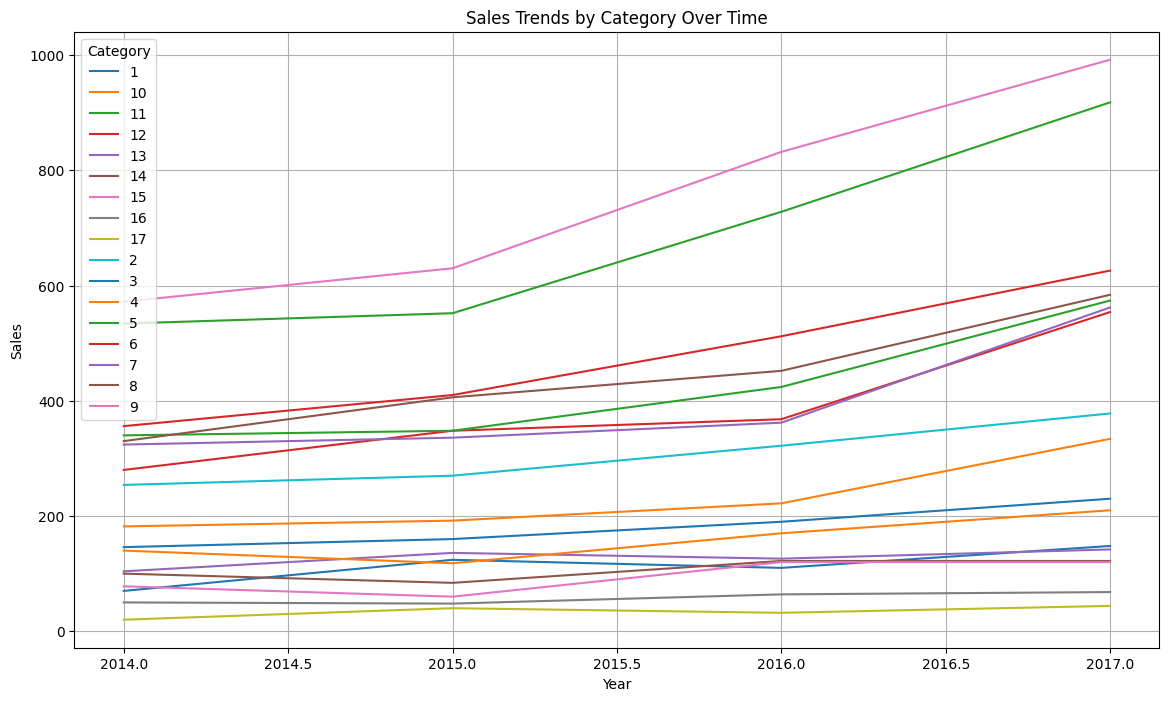

In [42]:
# Plot the aggregrated data by year
plt.figure(figsize=(14, 8))

for category in category_sales_by_year['Category'].unique():
    subset = category_sales_by_year[category_sales_by_year['Category'] == category]
    plt.plot(subset['Year'], subset['Sales'], label=category)

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Trends by Category Over Time')
plt.legend(title='Category')
plt.grid(True)
plt.show()

In [43]:
# Pivot the data to create a summary table
summary_table = category_sales_by_year.pivot_table(index='Category', columns='Year', aggfunc='size', fill_value=0)

# Convert the pivot table to a binary presence table
summary_table = summary_table.applymap(lambda x: 'Yes' if x > 0 else 'No')

# Display the summary table
print(summary_table)

Year     2014 2015 2016 2017
Category                    
1         Yes  Yes  Yes  Yes
10        Yes  Yes  Yes  Yes
11        Yes  Yes  Yes  Yes
12        Yes  Yes  Yes  Yes
13        Yes  Yes  Yes  Yes
14        Yes  Yes  Yes  Yes
15        Yes  Yes  Yes  Yes
16        Yes  Yes  Yes  Yes
17        Yes  Yes  Yes  Yes
2         Yes  Yes  Yes  Yes
3         Yes  Yes  Yes  Yes
4         Yes  Yes  Yes  Yes
5         Yes  Yes  Yes  Yes
6         Yes  Yes  Yes  Yes
7         Yes  Yes  Yes  Yes
8         Yes  Yes  Yes  Yes
9         Yes  Yes  Yes  Yes


Only 5 days of transaction in 2018, assume to disregard the year

In [44]:
# Aggregate sales by product
product_sales = df_merged.groupby('ProductID')['Units_Sold'].sum().reset_index()

# Merge with product names for better readability
product_sales = pd.merge(product_sales, df_prod[['ProductID', 'ProductName']], on='ProductID')

# Sort by sales in descending order
product_sales = product_sales.sort_values(by='Units_Sold', ascending=False)

# Display the top products by sales, top 10 only
print(product_sales.head(10))

            ProductID  Units_Sold  \
1568  TEC-AC-10003832         150   
1143  OFF-PA-10001970         140   
694   OFF-BI-10001524         134   
721   OFF-BI-10002026         128   
93    FUR-CH-10002647         128   
325   FUR-TA-10001095         122   
1516  TEC-AC-10002049         120   
835   OFF-BI-10004728         118   
110   FUR-CH-10003774         118   
183   FUR-FU-10001473         114   

                                            ProductName  
1568  Imation 16GB Mini TravelDrive USB 2.0 Flash Drive  
1143                                         Xerox 1881  
694   GBC Premium Transparent Covers with Diagonal L...  
721                   Ibico Recycled Linen-Style Covers  
93           Situations Contoured Folding Chairs, 4/Set  
325                  Chromcraft Round Conference Tables  
1516          Logitech G19 Programmable Gaming Keyboard  
835   Wilson Jones Turn Tabs Binder Tool for Ring Bi...  
110     Global Wood Trimmed Manager's Task Chair, Khaki  
183   Eldon 

In [45]:
df_merged.columns

Index(['Transaction_date', 'Subtotal', 'Taxes', 'DiscountPrice', 'TotalAmount',
       'Products_ProductID_x', 'Units_Sold', 'Cat-SubCat_ID', 'Cat_ID',
       'SubCat_ID', 'Quarter', 'Year', 'Month', 'Year-Month',
       'Day_of_the_Week', 'ProductID', 'ProductName', 'ProductStock', 'Price',
       'Discount', 'Category', 'SubCategory', 'Brands_Brand_id',
       'Products_ProductID_y'],
      dtype='object')

In [46]:
# Aggregate sales by category
category_sales = df_merged.groupby('Category')['Units_Sold'].sum().reset_index()

# Sort by sales in descending order
category_sales = category_sales.sort_values(by='Units_Sold', ascending=False)

# Reset the index to avoid confusion with default indices
category_sales = category_sales.reset_index(drop=True)

# Display only the two columns: Category and Quantity
print(category_sales[['Category', 'Units_Sold']])


   Category  Units_Sold
0         9       11864
1        11       10334
2         6        7092
3         8        6552
4         5        6296
5         7        5988
6        12        5952
7         2        4676
8        10        3454
9         3        2786
10        4        2482
11       13        1812
12       14        1804
13        1        1724
14       15        1280
15       16         880
16       17         468


In [47]:
print(df_trans['Transaction_date'].dtype)

datetime64[ns]


In [51]:
df_trans['Year'] = df_trans['Transaction_date'].dt.year
df_trans['Quarter'] = df_trans['Transaction_date'].dt.to_period('Q')

quarterly_sales = df_trans.groupby(['Year', 'Quarter']).agg({
    'Quantity': 'sum',
    'Subtotal': 'sum',
    'Taxes': 'sum',
    'DiscountPrice': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

display(quarterly_sales)

KeyError: 'Transaction_date'

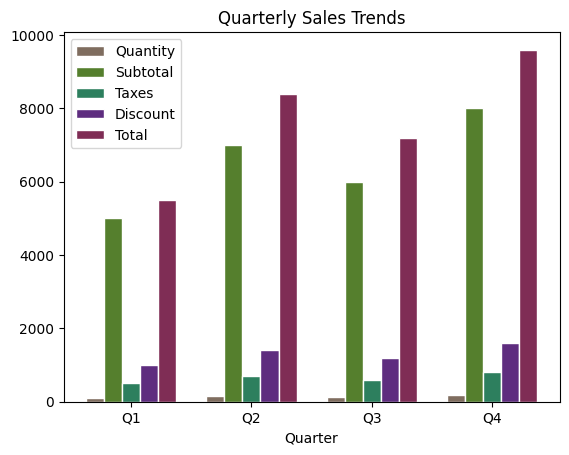

In [50]:
# @title Quarterly Sales Trends

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
quantity = [100, 150, 120, 180]
subtotal = [5000, 7000, 6000, 8000]
taxes = [500, 700, 600, 800]
discount_price = [1000, 1400, 1200, 1600]
total_amount = [5500, 8400, 7200, 9600]

# Set width of bars
bar_width = 0.15

# Set position of bars on X axis
r1 = range(len(quarters))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Make the plot
plt.bar(r1, quantity, color='#7f6d5f', width=bar_width, edgecolor='white', label='Quantity')
plt.bar(r2, subtotal, color='#557f2d', width=bar_width, edgecolor='white', label='Subtotal')
plt.bar(r3, taxes, color='#2d7f5e', width=bar_width, edgecolor='white', label='Taxes')
plt.bar(r4, discount_price, color='#5e2d7f', width=bar_width, edgecolor='white', label='Discount')
plt.bar(r5, total_amount, color='#7f2d55', width=bar_width, edgecolor='white', label='Total')

# Add xticks on the middle of the group bars
plt.xlabel('Quarter')
plt.xticks([r + bar_width*2 for r in range(len(quarters))], quarters)

# Create legend & Show graphic
plt.legend()
_ = plt.title('Quarterly Sales Trends')

In [49]:
df_trans.set_index('Transaction_date', inplace=True)

quarterly_grouped_df = df_trans.groupby(pd.Grouper(freq='Q')).agg({
    'Units_Sold': 'sum',
    'Subtotal': 'sum',
    'Taxes': 'sum',
    'DiscountPrice': 'sum',
    'TotalAmount': 'sum'
})

print(quarterly_grouped_df)

                  Units_Sold   Subtotal     Taxes  DiscountPrice  TotalAmount
Transaction_date                                                             
2014-03-31               959  205176.62  11653.94       18714.49    216830.60
2014-06-30              1517  147305.61   7631.39       25205.57    154936.92
2014-09-30              2098  252373.60  13896.31       30036.74    266269.66
2014-12-31              2791  295520.76  15520.44       47197.49    311041.02
2015-03-31              1156  127023.01   6740.01       19183.17    133763.03
2015-06-30              1608  149077.02   7910.95       22504.38    156987.79
2015-09-30              2187  212482.68  11211.44       33101.96    223694.00
2015-12-31              3158  307001.53  16265.47       46758.43    323266.81
2016-03-31              1269  181564.19   9936.26       22585.28    191500.42
2016-06-30              2235  283579.23  15618.07       33695.28    299197.07
2016-09-30              2714  220081.40  11598.66       34506.99

In [52]:
#Groupby to create dataframe of items sold per year
items_per_year = df_trans.groupby(['Products_ProductID','Cat-SubCat_ID','Cat_ID','Year']).Units_Sold.sum().reset_index()
#create column that counts the instances of the item in the DataFrame - counts the number of years the product was sold (between 2014-2017)
items_per_year['No. Years sold'] = items_per_year.groupby(['Products_ProductID']).transform('size')

items_per_year

,Products_ProductID,Cat-SubCat_ID,Cat_ID,Year,Units_Sold,No. Years sold
0,FUR-BO-10000112,FUR-BO,FUR,2017,9,1
1,FUR-BO-10000330,FUR-BO,FUR,2014,4,3
2,FUR-BO-10000330,FUR-BO,FUR,2015,4,3
3,FUR-BO-10000330,FUR-BO,FUR,2017,2,3
4,FUR-BO-10000362,FUR-BO,FUR,2014,8,3
...,...,...,...,...,...,...
5347,TEC-PH-10004959,TEC-PH,TEC,2015,1,2
5348,TEC-PH-10004977,TEC-PH,TEC,2014,6,4
5349,TEC-PH-10004977,TEC-PH,TEC,2015,2,4
5350,TEC-PH-10004977,TEC-PH,TEC,2016,7,4


In [53]:
subcat_per_year = df_trans.groupby(['Cat-SubCat_ID','Year']).Units_Sold.sum().reset_index()
#subcat_per_year['No. Years sold'] = items_per_year.groupby(['Cat-SubCat_ID']).transform('size')

subcat_per_year.sort_values(['Units_Sold'], ascending=False).head(50).reset_index()

,index,Cat-SubCat_ID,Year,Units_Sold
0,27,OFF-BI,2017,2051
1,43,OFF-PA,2017,1706
2,26,OFF-BI,2016,1615
3,42,OFF-PA,2016,1363
4,25,OFF-BI,2015,1195
5,23,OFF-AR,2017,1105
6,41,OFF-PA,2015,1103
7,11,FUR-FU,2017,1090
8,55,TEC-AC,2017,1084
9,67,TEC-PH,2017,1080


In [56]:
# Instead of one item, we choose one sub-catagory 'OFF-BI'.

# df_subcat = df_trans.query("'Cat-SubCat_ID' == 'OFF-BI'").sort_values(["Transaction_date"], axis=0, ascending=[True])

df_subcat = df_trans.query("`Cat-SubCat_ID` == 'OFF-BI'")
df_subcat = df_subcat.sort_values(["Transaction_date"], axis=0, ascending=[True])

df_subcat

,Subtotal,Taxes,DiscountPrice,TotalAmount,Products_ProductID,Units_Sold,Cat-SubCat_ID,Cat_ID,SubCat_ID,Quarter,Year,Month,Year-Month,Day_of_the_Week
Transaction_date,,,,,,,,,,,,,,
2014-01-08,5.31,0.33,0.00,5.64,OFF-BI-10004094,2,OFF-BI,OFF,BI,2014Q1,2014,1,2014-01,Wednesday
2014-01-10,41.44,2.33,4.14,43.77,OFF-BI-10004632,2,OFF-BI,OFF,BI,2014Q1,2014,1,2014-01,Friday
2014-01-12,31.29,1.96,0.00,33.25,OFF-BI-10003708,7,OFF-BI,OFF,BI,2014Q1,2014,1,2014-01,Sunday
2014-01-15,11.28,0.71,0.00,11.99,OFF-BI-10004187,3,OFF-BI,OFF,BI,2014Q1,2014,1,2014-01,Wednesday
2014-01-18,6.88,0.43,0.00,7.31,OFF-BI-10003476,2,OFF-BI,OFF,BI,2014Q1,2014,1,2014-01,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29,1.93,0.12,0.00,2.05,OFF-BI-10003314,1,OFF-BI,OFF,BI,2017Q4,2017,12,2017-12,Friday
2017-12-30,15.98,1.00,0.00,16.98,OFF-BI-10001679,3,OFF-BI,OFF,BI,2017Q4,2017,12,2017-12,Saturday
2017-12-30,8.68,0.54,0.00,9.22,OFF-BI-10000632,1,OFF-BI,OFF,BI,2017Q4,2017,12,2017-12,Saturday


In [57]:
df_subcat.dtypes

Subtotal                    float64
Taxes                       float64
DiscountPrice               float64
TotalAmount                 float64
Products_ProductID           object
Units_Sold                    int64
Cat-SubCat_ID                object
Cat_ID                       object
SubCat_ID                    object
Quarter               period[Q-DEC]
Year                          int32
Month                         int32
Year-Month                period[M]
Day_of_the_Week              object
dtype: object

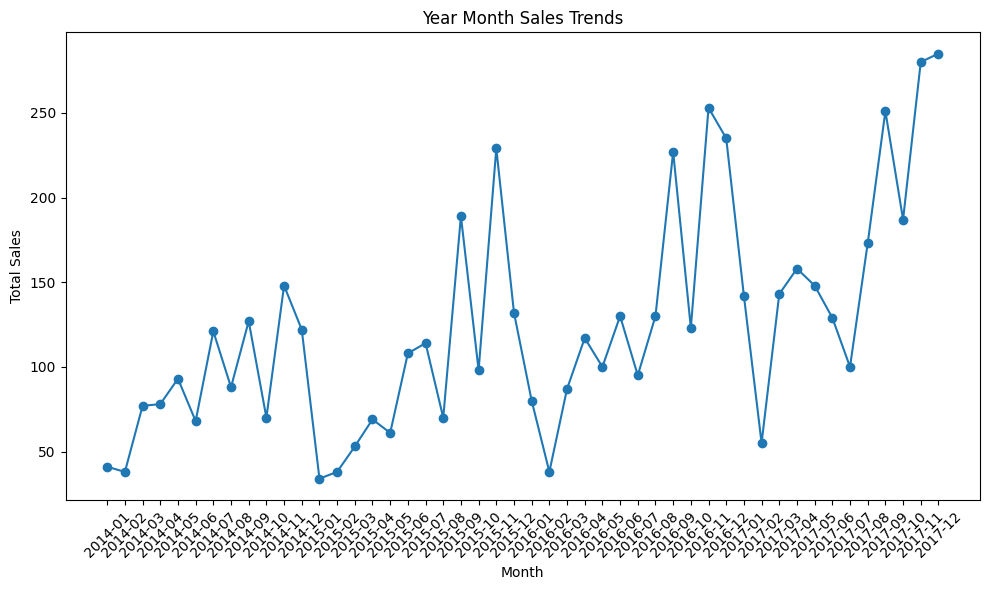

In [58]:
# @title Monthly Sales Trends

# Group data and reset index to get a DataFrame
df_grouped = df_subcat.groupby(['Year-Month'])['Units_Sold'].sum().reset_index()

# Convert 'Year-Month' to string for plotting
df_grouped['Year-Month'] = df_grouped['Year-Month'].astype(str)

# Plot the line graph with correct labels and title
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.plot(df_grouped['Year-Month'], df_grouped['Units_Sold'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Year Month Sales Trends')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()